# Positional Encoding - Complete Notebook

This notebook explains positional encoding from A to Z with examples.

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn


In [2]:

def positional_encoding(seq_len, d_model):
    pe = np.zeros((seq_len, d_model))
    for pos in range(seq_len):
        for i in range(0, d_model, 2):
            pe[pos, i] = np.sin(pos / (10000 ** ((2 * i) / d_model)))
            if i + 1 < d_model:
                pe[pos, i + 1] = np.cos(pos / (10000 ** ((2 * (i + 1)) / d_model)))
    return pe


In [3]:

seq_len = 10
d_model = 16
pe = positional_encoding(seq_len, d_model)
pe


array([[ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00],
       [ 8.41470985e-01,  9.50415280e-01,  9.98334166e-02,
         9.99500042e-01,  9.99983333e-03,  9.99995000e-01,
         9.99999833e-04,  9.99999950e-01,  9.99999998e-05,
         9.99999999e-01,  1.00000000e-05,  1.00000000e+00,
         1.00000000e-06,  1.00000000e+00,  1.00000000e-07,
         1.00000000e+00],
       [ 9.09297427e-01,  8.06578410e-01,  1.98669331e-01,
         9.98000667e-01,  1.99986667e-02,  9.99980000e-01,
         1.99999867e-03,  9.99999800e-01,  1.99999999e-04,
         9.99999998e-01,  2.00000000e-05,  1.00000000e+00,
         2.00000000e-06,  1.00000000e+00,  2.00000000e-07,
         1.00000000e+00],
       [ 1.41120008e-01,  5.82753611e

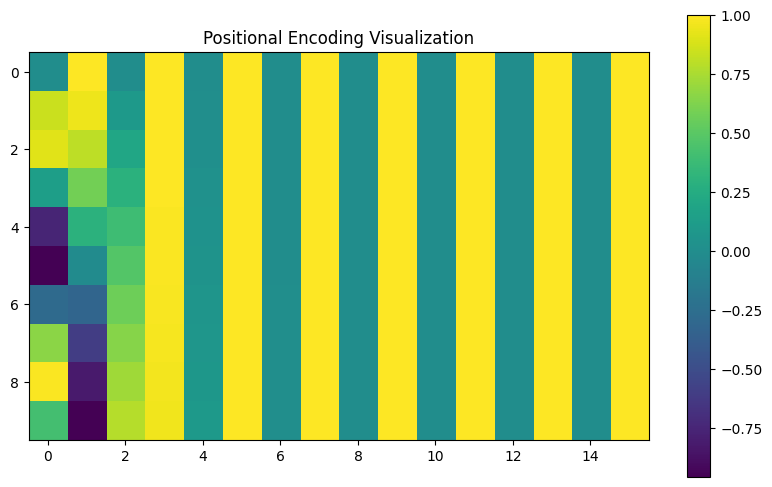

In [4]:

plt.figure(figsize=(10,6))
plt.imshow(pe, cmap='viridis')
plt.colorbar()
plt.title("Positional Encoding Visualization")
plt.show()


In [5]:

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:, :x.size(1)]


In [6]:

x = torch.rand(2, 10, 16)
pos_encoder = PositionalEncoding(16)
pos_encoder(x).shape


torch.Size([2, 10, 16])